# Visualization with Seaborn

Matplotlib is really useful, but
- need a lote of boilerplate code for sophisticated visualization
- predated Pandas, and is not build to work with `DataFrame` (even if it starts handling it)

An answer to these problems is `Seaborn`. It provides an API on top of Matplotlib, and define high-level functions for common statistical plot types

## Seaborn Versus Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Let's create some random walk data, then plot them

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

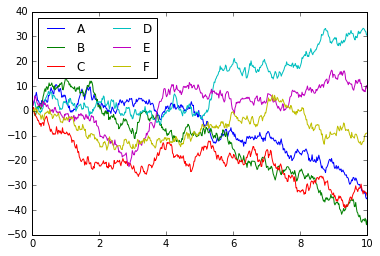

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

It's correct, but looks a bit old. Let's see the result with `seaborn`

In [4]:
import seaborn as sns
sns.set()

/home/tomperr/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


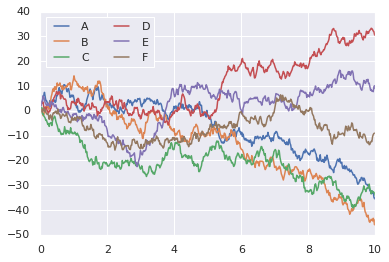

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

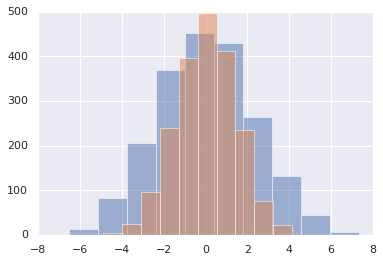

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Rather than a histogram, we can get a smooth estimate using a kernel density estimation, which Seaborn does with `sns.kdeplot`

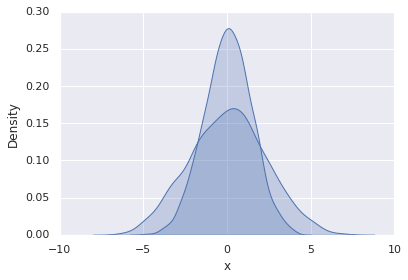

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

And it can be combined with histograms using `distplot`

/home/tomperr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tomperr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


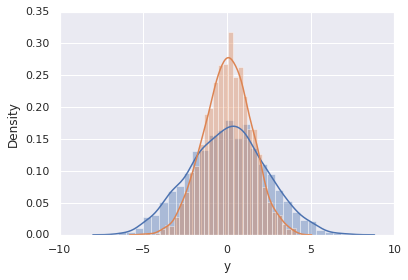

In [9]:
sns.distplot(data['x'])
sns.distplot(data['y']);